<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_out_2020/blob/main/PSD_GRAIN_NOT_GRAIN_out_19_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [ ]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 3.2MB/s 


In [ ]:
import mahotas.features.texture as mht
import mahotas.features

In [ ]:

!git clone https://github.com/ucfilho/marquesgabi_out_2020/
%cd marquesgabi_out_2020
from Get_PSDArea import PSDArea

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 57 (delta 30), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (57/57), done.
/content/marquesgabi_out_2020


In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_out_2020/marquesgabi_fev_2020


In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 287 (delta 15), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (287/287), 78.56 MiB | 38.16 MiB/s, done.
Resolving deltas: 100% (138/138), done.
/content/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado


In [ ]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 287 (delta 15), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (287/287), 78.56 MiB | 37.21 MiB/s, done.
Resolving deltas: 100% (138/138), done.


In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_set_2020
%cd marquesgabi_set_2020

Cloning into 'marquesgabi_set_2020'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 266 (delta 44), reused 0 (delta 0), pack-reused 194
Receiving objects: 100% (266/266), 7.00 MiB | 3.36 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020


In [ ]:
from big_segment import Segmenta  # got image provided segmented
from ANN_FIND_GRAIN import AnnGrain  # got image provided segmented
from psd_mahotas import Mahotas

In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 287 (delta 15), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (287/287), 78.56 MiB | 36.53 MiB/s, done.
Resolving deltas: 100% (138/138), done.
/content/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/Doutorado


In [ ]:
df=Segmenta(img)


In [ ]:
print(df)

    Width          0          1  ...         781         782         783
0     161  28.986769  28.287336  ...   45.272213   42.183365   26.758034
1     106  69.403702  71.672119  ...   59.045212   59.579922   57.194023
2     113  70.552589  66.295403  ...   56.171585   53.243950   52.019894
3     199  95.229507  99.569855  ...   57.668190   49.434433   73.674828
4     171  85.597519  92.534492  ...   76.063141   69.080406   71.079170
..    ...        ...        ...  ...         ...         ...         ...
45    193  59.017559  60.358051  ...    8.875191    7.276142    5.602647
46    118  79.752083  85.438950  ...  135.040207  135.631989  136.946564
47    186  95.568161  98.351151  ...    5.759857    5.654412    5.584114
48    172   2.476474   0.969713  ...   48.823154   30.236885   15.388860
49    106  41.782486  41.833752  ...    3.895693    2.441438    0.679245

[150 rows x 785 columns]


In [ ]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 33.5237 - accuracy: 0.4169 
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 1.5556 - accuracy: 0.4985
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 2.8800 - accuracy: 0.5160
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 3.7409 - accuracy: 0.4956
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 3.7750 - accuracy: 0.4956
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 3.1000 - accuracy: 0.4956
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 2.2300 - accuracy: 0.4956
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2851 - accuracy: 0.4956
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.6531
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.8309
Epoch 1

In [ ]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 17.9967 - accuracy: 0.4723
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 2.4692 - accuracy: 0.4956
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3473 - accuracy: 0.5277
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 1.6710 - accuracy: 0.4956
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 2.7368 - accuracy: 0.4956
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 2.6831 - accuracy: 0.4956
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 2.2346 - accuracy: 0.4956
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 1.6382 - accuracy: 0.4956
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0482 - accuracy: 0.4956
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.5831
Epoch 11

In [ ]:
print(confusion_matrix)

Predicted   0   1
Actual           
0          72   0
1           0  75


In [ ]:
df.shape

(150, 785)

In [ ]:
# open file to get df 
# use df and ANN to get grains and no grains
# use grains to obtain psd

In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Cloning into 'Doutorado'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 287 (delta 15), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (287/287), 78.56 MiB | 38.09 MiB/s, done.
Resolving deltas: 100% (138/138), done.
/content/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/Doutorado/Doutorado


In [ ]:
k=0
for Item in img_name:
  print(k,Item)
  k=k+1

img=ww[21]


0 Fotos_Grandes-3cdAmostra/Q6-8-4.jpg
1 Fotos_Grandes-3cdAmostra/Q6-5-3.jpg
2 Fotos_Grandes-3cdAmostra/Q6-7-4.jpg
3 Fotos_Grandes-3cdAmostra/Q6-8-2.jpg
4 Fotos_Grandes-3cdAmostra/Q6-3-2.jpg
5 Fotos_Grandes-3cdAmostra/Q6-7-2.jpg
6 Fotos_Grandes-3cdAmostra/Q6-4-4.jpg
7 Fotos_Grandes-3cdAmostra/Q6-9-5.jpg
8 Fotos_Grandes-3cdAmostra/Q6-2-5.jpg
9 Fotos_Grandes-3cdAmostra/Q6-8-3.jpg
10 Fotos_Grandes-3cdAmostra/Q6-9-3.jpg
11 Fotos_Grandes-3cdAmostra/Q6-1-2.jpg
12 Fotos_Grandes-3cdAmostra/Q6-6-3.jpg
13 Fotos_Grandes-3cdAmostra/Q6-3-4.jpg
14 Fotos_Grandes-3cdAmostra/Q6-1-4.jpg
15 Fotos_Grandes-3cdAmostra/Q6-6-2.jpg
16 Fotos_Grandes-3cdAmostra/Q6-4-3.jpg
17 Fotos_Grandes-3cdAmostra/Q6-7-3.jpg
18 Fotos_Grandes-3cdAmostra/Q6-2-2.jpg
19 Fotos_Grandes-3cdAmostra/Q6-9-2.jpg
20 Fotos_Grandes-3cdAmostra/Q6-1-5.jpg
21 Fotos_Grandes-3cdAmostra/Q6-6-5.jpg
22 Fotos_Grandes-3cdAmostra/Q6-2-1.jpg
23 Fotos_Grandes-3cdAmostra/Q6-5-2.jpg
24 Fotos_Grandes-3cdAmostra/Q6-4-1.jpg
25 Fotos_Grandes-3cdAmostra/Q6-3-1.

In [ ]:
df=Segmenta(img)

In [ ]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 

Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 6.7964 - accuracy: 0.4402 
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9458 - accuracy: 0.5452
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9408 - accuracy: 0.5277
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 1.1919 - accuracy: 0.4956
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5073
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.7872
Epoch 7/200
11/11 [==============================] - 0s 3ms/step - loss: 0.3896 - accuracy: 0.6910
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.7026
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.6443
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8105
Epoch 11

In [ ]:
# print(y_pred.ravel())

In [ ]:
Grain=[]; Ind=[]; Size=[]
k=0
for item in y_pred:
  if(item == 0):
    Ind.append(k)
  k=k+1

df = df.reset_index(drop=True)

df_size = df.drop(df.index[Ind])

Width=np.array(df_size['Width'])

# print(Width)

# print(df_size.shape)

In [ ]:
# pd.set_option('display.max_rows', None)
# print(df_size)

In [ ]:
# print(len(y_pred.ravel()))

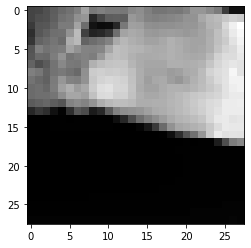

In [ ]:
Size=28
qual_img=40
L = Width[qual_img]
data=np.array(df_size.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

In [ ]:
mean_value = np.mean(img)
img_new = img.copy()

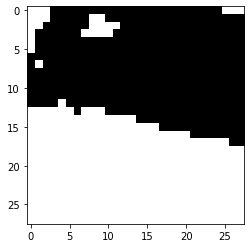

In [ ]:

for i in range(28):
  for j in range(28):
    if img[i,j] < mean_value:
      img_new[i,j] = 255
    else:
      img_new[i,j] = 0

img28=cv2.resize(img_new,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")


In [ ]:
L = Width[qual_img]
Area = np.sum(img_new) / (255.0 * 28 * 28)* L*L
print(Area)

12355.94005102041


In [ ]:
Area_All, Diameter_All=PSDArea(df_size) 


In [ ]:
df_size.shape

(150, 785)

In [ ]:
# print(Area_All)
# print(Diameter_All)

[1.561389777981505, 2.0747341322448976, 0.8586487193877549, 1.8867121773692603, 1.3366216832142856, 2.3552467956792094, 0.7666174331632652, 1.6948981529942602, 0.5813234130994896, 2.5792226775000002, 1.0235146568877551, 0.6709474731122449, 1.2353475047831632, 2.8845687698150515, 0.8094730948278059, 2.302372698979591, 2.4827839038424746, 1.6580267578124999, 2.472622014030612, 2.5893587209821423, 0.9029979624489795, 0.40562832225765305, 1.4035020436320151, 1.6741498206409438, 0.9300329174617347, 1.5968218843526787, 1.4290811926530615, 1.6326315918367347, 2.743947301339285, 1.557716999234694, 1.5087294870153058, 1.4603635102040817, 1.6158735351562499, 2.09781414, 2.319017735318878, 1.0088088599617344, 1.0439216341645405, 1.1114686463647958, 0.6802518459374999, 0.53511736359375, 1.4815081019674745, 1.08936666984375, 1.9425901069802298, 2.540319821977041, 1.252858775510204, 1.0237472738552296, 2.2780950426562496, 0.5422920906122447, 0.4903920487882652, 0.7165722096045919, 1.17680556796875, 

In [ ]:
'''
d = 1.6343255246592054
r = d / 2.0
Area = np.pi * d**2 / 4; print('Area=',Area)
'''

Area= 2.09781414
